In [7]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_ds="D:\Belajar_deep_learning\CERTH_ImageBlurDataset_2\CERTH_ImageBlurDataset\Training"

# Data preprocessing
****

In [9]:
os.listdir('D:\Belajar_deep_learning\CERTH_ImageBlurDataset_2\CERTH_ImageBlurDataset\Training')

['blur', 'focus']

In [10]:
batch_size=32
img_size=224

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    validation_split=0.25,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    vertical_flip=True)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_ds,
    target_size=(224, 224),
    # color_mode='grayscale',
    batch_size=8,
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_ds, # same directory as training data
    target_size=(224, 224),
    # color_mode='grayscale',
    batch_size=8,
    subset='validation')

Found 586 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [12]:
train_generator[0][0].shape

(8, 224, 224, 3)

In [13]:
img= train_generator[0]
print(img)

(array([[[[0.59607846, 0.5294118 , 0.25490198],
         [0.59607846, 0.5294118 , 0.25490198],
         [0.59607846, 0.5294118 , 0.25490198],
         ...,
         [0.3254902 , 0.20392159, 0.09019608],
         [0.3254902 , 0.20392159, 0.09019608],
         [0.3254902 , 0.20392159, 0.09019608]],

        [[0.59607846, 0.5294118 , 0.25490198],
         [0.59607846, 0.5294118 , 0.25490198],
         [0.59607846, 0.5294118 , 0.25490198],
         ...,
         [0.3254902 , 0.20392159, 0.09019608],
         [0.3254902 , 0.20392159, 0.09019608],
         [0.3254902 , 0.20392159, 0.09019608]],

        [[0.59607846, 0.5294118 , 0.25490198],
         [0.59607846, 0.5294118 , 0.25490198],
         [0.59607846, 0.5294118 , 0.25490198],
         ...,
         [0.3254902 , 0.20392159, 0.09019608],
         [0.3254902 , 0.20392159, 0.09019608],
         [0.3254902 , 0.20392159, 0.09019608]],

        ...,

        [[0.5058824 , 0.43529415, 0.24705884],
         [0.5058824 , 0.43529415, 0.24705884

In [14]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [15]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(8, 224, 224, 3)
(8, 2)


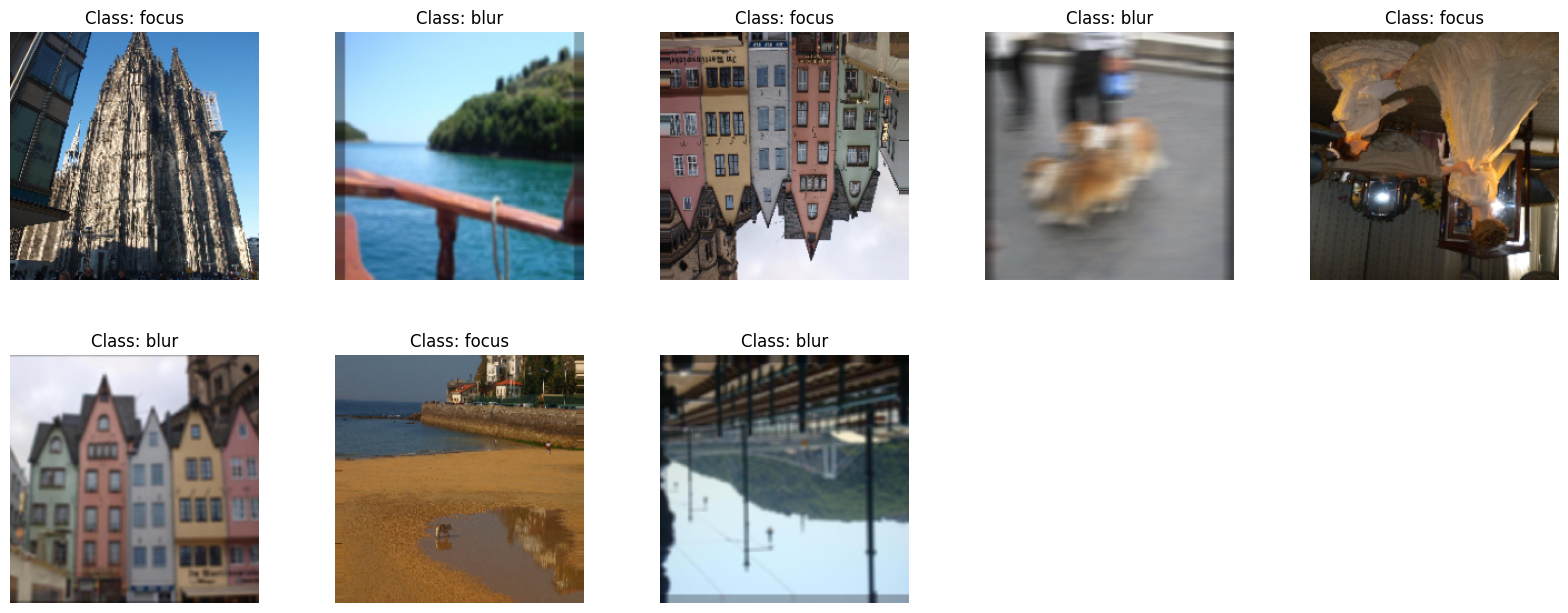

In [16]:
def plot_images(images, titles, labels):
    plt.figure(figsize=(20, 20))

    for i, (image, title) in enumerate(zip(images, titles)):
        if i >= 15:
            break

        plt.subplot(5, 5, i+1)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        plt.imshow(image)
        plt.title(f'Class: {labels[np.argmax(title, axis=0)]}')
        plt.axis("off")

labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plot_images(images, titles, labels)

In [17]:
print(len(train_generator))
print(len(validation_generator))
# print(len(validation_ds))

74
25


In [18]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D

# Build ConvNextBase Model

In [25]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = tf.keras.applications.ConvNeXtBase(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes =2

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_base_prestem_normaliz  (None, 224, 224, 3)  0          ['input_3[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_base_stem (Sequential  (None, 56, 56, 128)  6528       ['convnext_base_prestem_normaliza
 )                                                               tion[0][0]']               

In [26]:
model = mobilenet((224, 224, 3))

#   Model summary

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [29]:
# model_callbacks = [ModelCheckpoint("/content/drive/MyDrive/Dataset/CPE_checkpoint"),
#                   #  TensorBoard("/content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Tensorboard/Model_baru"),
#                   EarlyStopping(patience=8,monitor='val_loss', min_delta=0.01)]

In [31]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
74/74 [==============================] - 2392s 32s/step - loss: 0.5427 - accuracy: 0.8106 - val_loss: 0.4831 - val_accuracy: 0.8093
Epoch 2/20
74/74 [==============================] - 2070s 28s/step - loss: 0.5128 - accuracy: 0.8055 - val_loss: 0.4714 - val_accuracy: 0.8093
Epoch 3/20
74/74 [==============================] - 2379s 32s/step - loss: 0.4821 - accuracy: 0.8072 - val_loss: 0.5174 - val_accuracy: 0.8093
Epoch 4/20
69/74 [==========================>...] - ETA: 19:50 - loss: 0.4769 - accuracy: 0.8040

KeyboardInterrupt: 

In [26]:
results =pd.DataFrame(history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,0.266548,0.779310,0.378444,0.595745
1,0.198051,0.868966,0.232353,0.829787
2,0.219152,0.862069,0.240843,0.787234
3,0.205577,0.848276,0.337011,0.638298
4,0.255013,0.786207,0.435703,0.638298
5,0.286658,0.772414,0.268986,0.787234
6,0.205238,0.841379,0.304124,0.702128
7,0.170180,0.875862,0.259631,0.744681
8,0.194458,0.827586,0.286772,0.702128
9,0.156892,0.882759,0.337668,0.702128


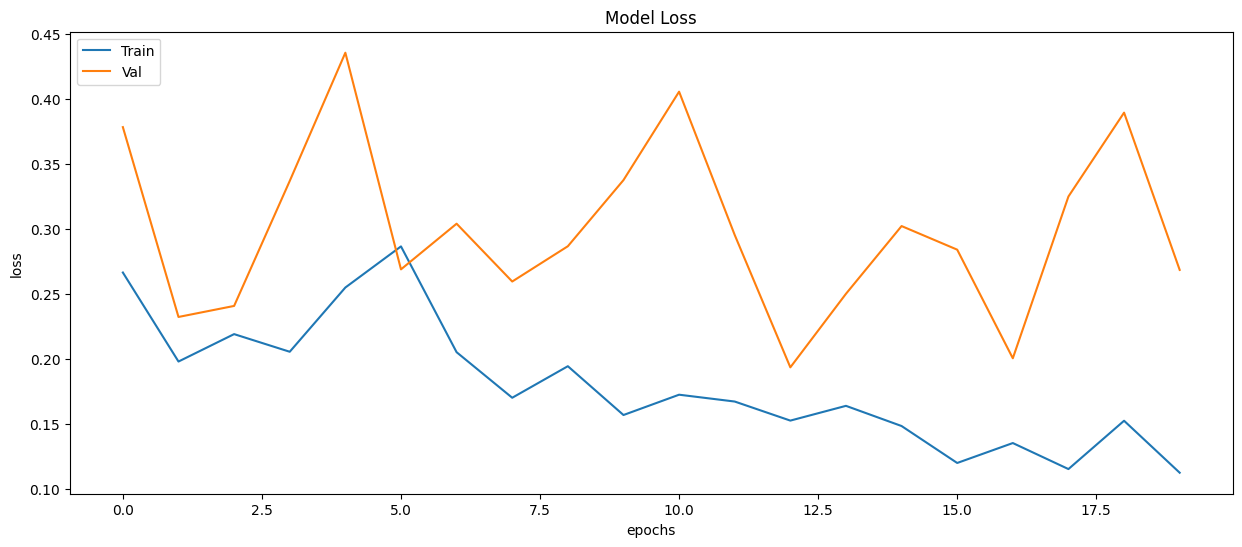

In [27]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

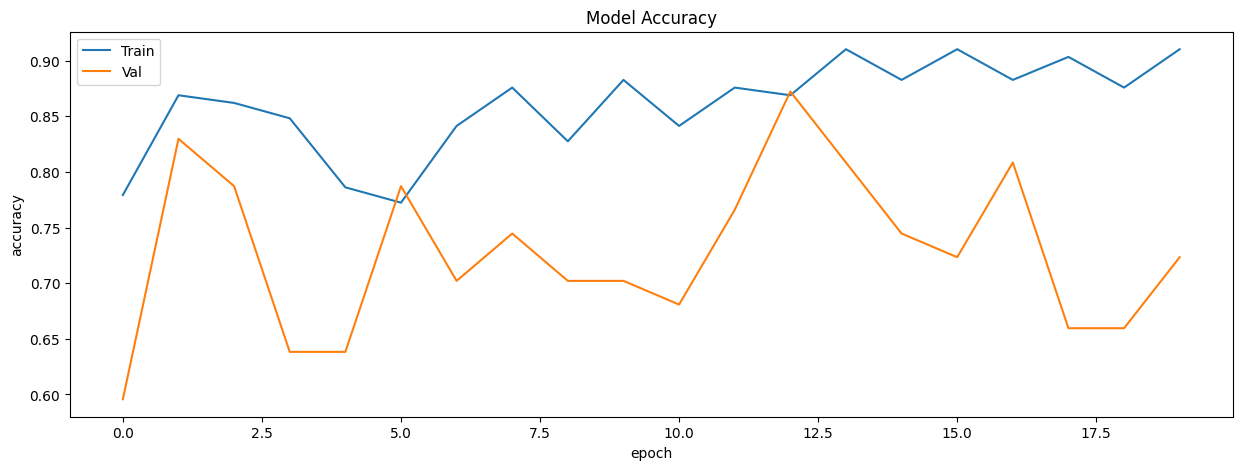

In [28]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 [==============================] - 6s 6s/step


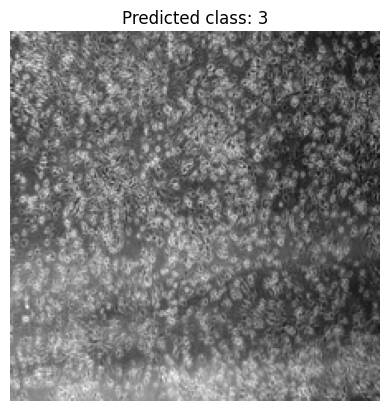

In [29]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/Dataset/CPE/CPE4'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

# Ensure 'img_index' is defined before using it
img_index = 41

# Select the single image for prediction
single_image = images[img_index]

# Reshape the image to match the model's input shape
single_image = single_image.reshape(1, img_size, img_size, 1)  # Assuming 3 channels

# Now you can proceed with model prediction
predictions = model.predict(single_image)

# Get predicted class label
class_label = np.argmax(predictions[0])  # Assuming you're predicting on a single image

# Display image and predicted class label
# Class 0 = CPE 1
# Class 1 = CPE 2
# Class 2 = CPE 3
# Class 3 = CPE 4
plt.imshow(images[img_index], cmap='gray')
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [30]:
for i in range(len(images)):
    single_image = images[i].reshape(1, img_size, img_size, 1)  # Assuming 3 channels
    predictions = model.predict(single_image)

    predicted_class = np.argmax(predictions[0])
    class_probability = predictions[0, predicted_class]

    print(f'Predicted class for {i+1}.jpg: {labels[predicted_class]}')
    print('Class probability:', class_probability)


1/1 [==============================] - 0s 84ms/step
Predicted class for 1.jpg: CPE4
Class probability: 0.8961946
1/1 [==============================] - 0s 80ms/step
Predicted class for 2.jpg: CPE4
Class probability: 0.9965578
1/1 [==============================] - 0s 82ms/step
Predicted class for 3.jpg: CPE4
Class probability: 0.9556311
1/1 [==============================] - 0s 79ms/step
Predicted class for 4.jpg: CPE4
Class probability: 0.9967242
1/1 [==============================] - 0s 86ms/step
Predicted class for 5.jpg: CPE4
Class probability: 0.99976677
1/1 [==============================] - 0s 125ms/step
Predicted class for 6.jpg: CPE4
Class probability: 0.9953042
1/1 [==============================] - 0s 114ms/step
Predicted class for 7.jpg: CPE4
Class probability: 0.76823926
1/1 [==============================] - 0s 96ms/step
Predicted class for 8.jpg: CPE4
Class probability: 0.9995888
1/1 [==============================] - 0s 98ms/step
Predicted class for 9.jpg: CPE4
Class pr

Thank You !

In [31]:
model.save('/content/drive/MyDrive/Dataset/CPE/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
